# Load both Dataset and Explore the CSV file

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

mobility_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/2020_AU_Region_Mobility_Report.csv')
covid_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/covid_cases.csv')


In [3]:
mobility_data.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AU,Australia,NaN,NaN,NaN,NaN,NaN,ChIJ38WHZwf9KysRUhNblaFnglM,2020-02-15,4.0,3.0,-2.0,3.0,3.0,0.0
1,AU,Australia,NaN,NaN,NaN,NaN,NaN,ChIJ38WHZwf9KysRUhNblaFnglM,2020-02-16,3.0,5.0,9.0,3.0,-1.0,0.0
2,AU,Australia,NaN,NaN,NaN,NaN,NaN,ChIJ38WHZwf9KysRUhNblaFnglM,2020-02-17,-1.0,0.0,-6.0,7.0,17.0,-2.0
3,AU,Australia,NaN,NaN,NaN,NaN,NaN,ChIJ38WHZwf9KysRUhNblaFnglM,2020-02-18,-3.0,-2.0,-13.0,7.0,14.0,-1.0
4,AU,Australia,NaN,NaN,NaN,NaN,NaN,ChIJ38WHZwf9KysRUhNblaFnglM,2020-02-19,-1.0,-1.0,-6.0,8.0,13.0,-1.0


In [4]:
covid_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


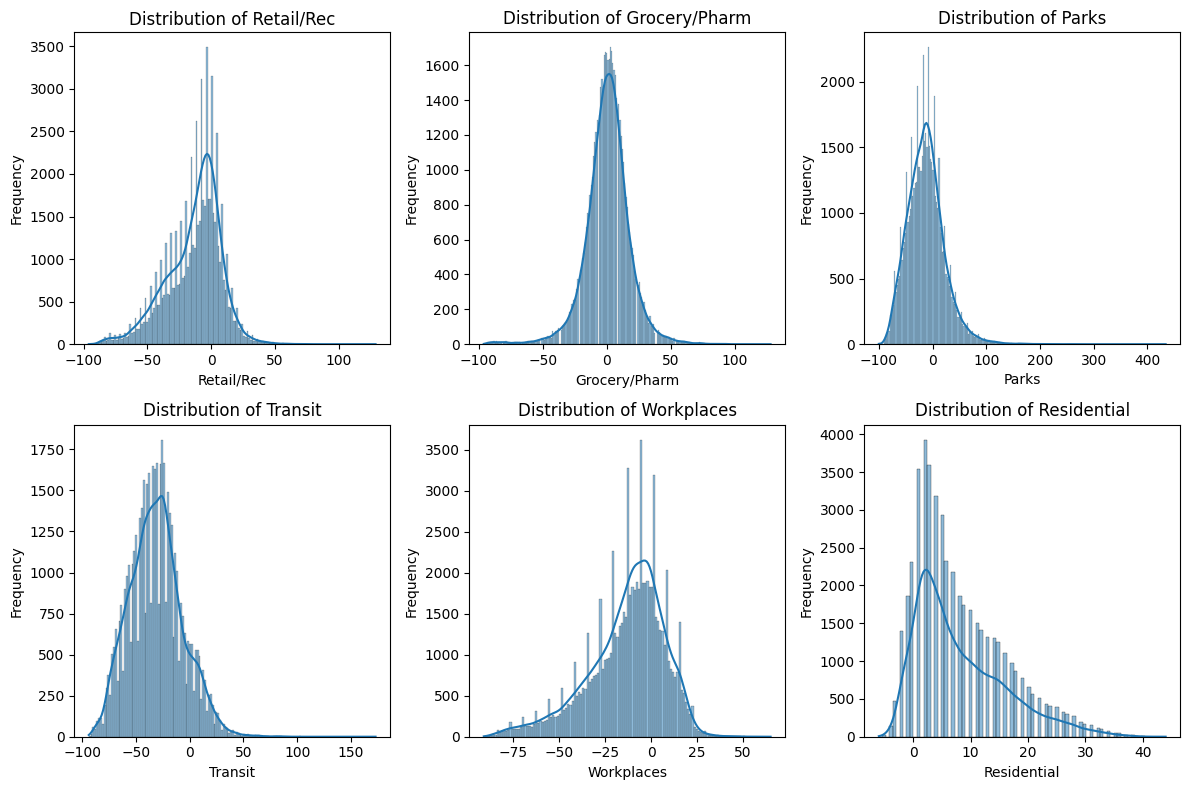

Summary Statistics:
         Retail/Rec  Grocery/Pharm         Parks       Transit    Workplaces  \
count  66554.000000   56171.000000  58192.000000  50013.000000  78609.000000   
mean     -13.287781       0.674084    -12.211438    -31.211025    -13.250569   
std       21.299059      17.413418     34.752009     24.713341     20.778223   
min      -96.000000     -96.000000   -100.000000    -94.000000    -91.000000   
25%      -26.000000      -8.000000    -36.000000    -48.000000    -24.000000   
50%       -9.000000       1.000000    -14.000000    -32.000000    -10.000000   
75%        1.000000      10.000000      7.000000    -16.000000      1.000000   
max      129.000000     128.000000    434.000000    173.000000     65.000000   

        Residential  
count  48487.000000  
mean       8.087652  
std        7.882133  
min       -6.000000  
25%        2.000000  
50%        6.000000  
75%       13.000000  
max       44.000000  

Missing Values:
Region             321
Date                 

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Google Mobility dataset (assuming you've already loaded the dataset)
# Replace 'your_dataset.csv' with the actual file path or URL to your dataset.
df =mobility_data

# Create shorter column names
short_column_names = {
    'sub_region_1': 'Region',
    'date': 'Date',
    'retail_and_recreation_percent_change_from_baseline': 'Retail/Rec',
    'grocery_and_pharmacy_percent_change_from_baseline': 'Grocery/Pharm',
    'parks_percent_change_from_baseline': 'Parks',
    'transit_stations_percent_change_from_baseline': 'Transit',
    'workplaces_percent_change_from_baseline': 'Workplaces',
    'residential_percent_change_from_baseline': 'Residential'
}

# Rename columns with shorter names
df = df.rename(columns=short_column_names)

# Select the columns of interest with shorter names
columns_of_interest = list(short_column_names.values())

# Create a subset of the DataFrame with selected columns
subset_df = df[columns_of_interest]

# Summarize statistics for numeric columns
summary_stats = subset_df.describe()

# Check for missing values
missing_values = subset_df.isnull().sum()

# Visualize data distributions
plt.figure(figsize=(12, 8))

# Loop through the columns and create histograms
for i, col in enumerate(columns_of_interest[2:]):
    plt.subplot(2, 3, i + 1)
    sns.histplot(subset_df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Display summary statistics and missing value counts
print("Summary Statistics:")
print(summary_stats)

print("\nMissing Values:")
print(missing_values)


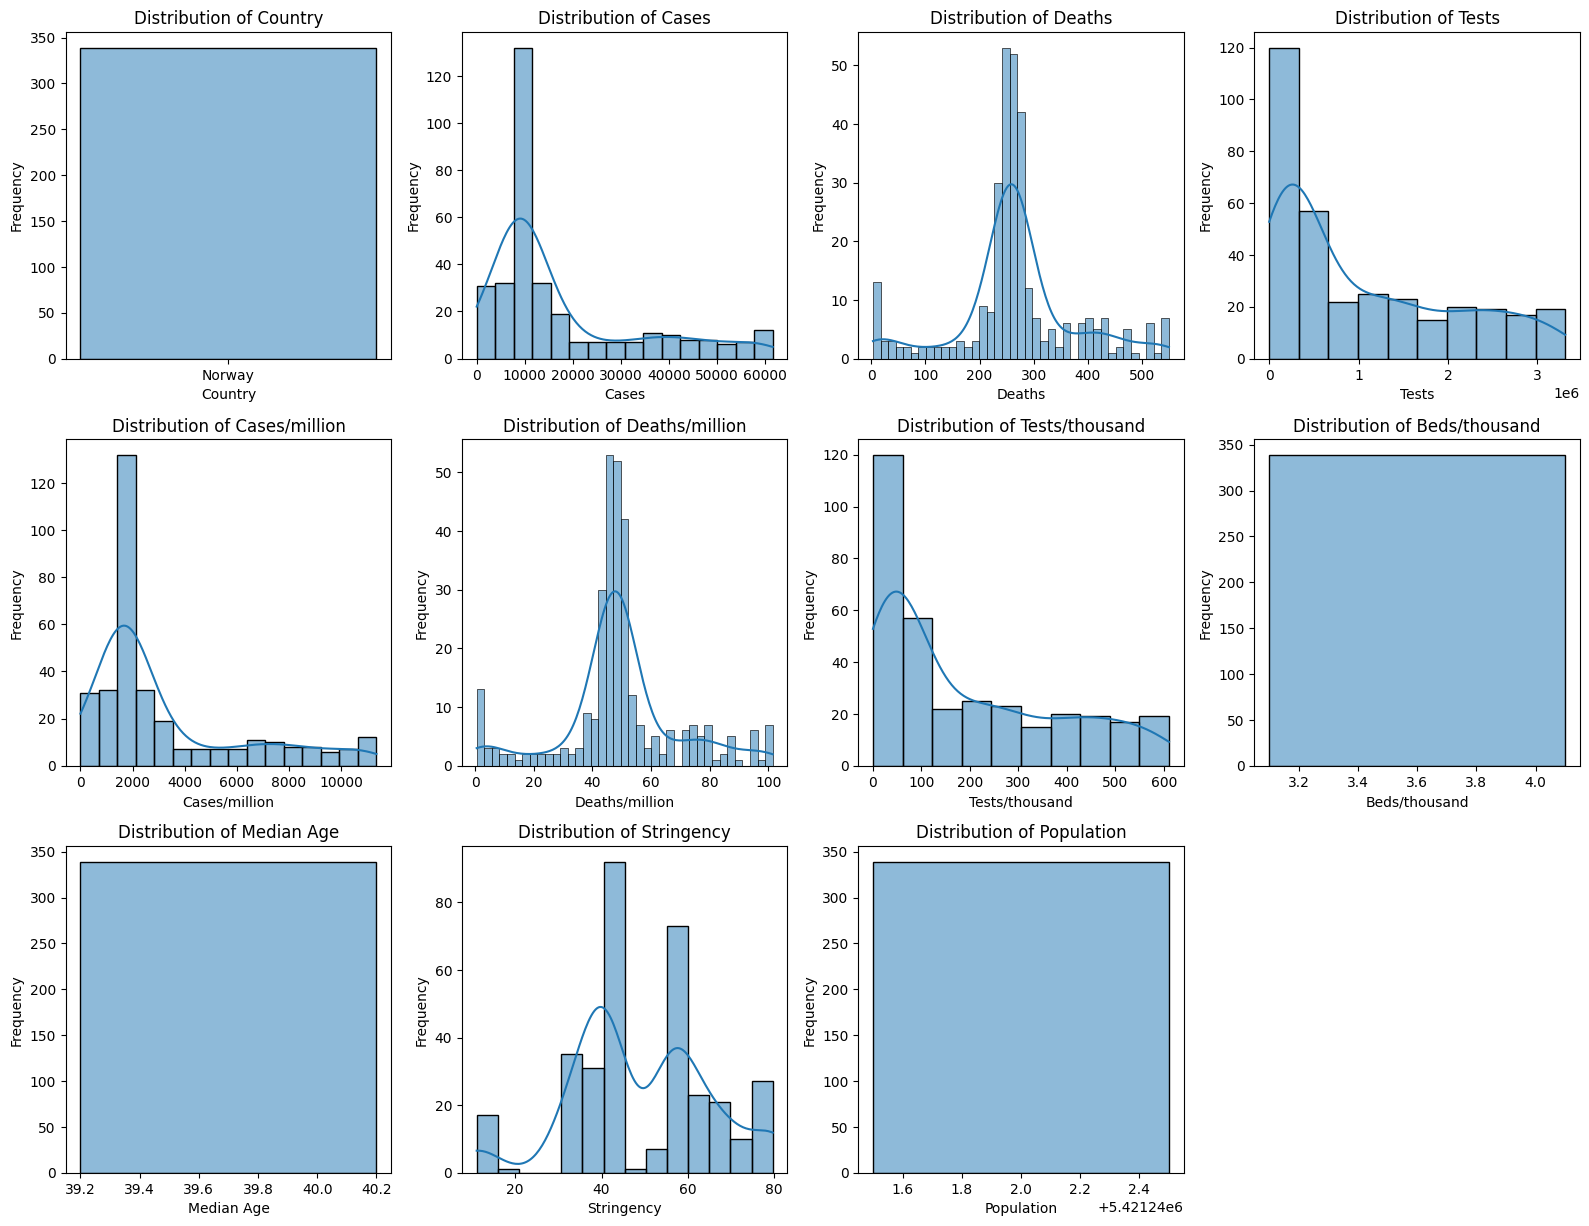

Summary Statistics for Norway:
              Cases    new_cases  new_cases_smoothed      Deaths  new_deaths  \
count    336.000000   336.000000          331.000000  319.000000  319.000000   
mean   17565.610119   183.315476          183.626677  267.905956    1.724138   
std    16134.099276   217.666626          194.335584  109.051848    3.511761   
min        1.000000     0.000000            3.571000    3.000000    0.000000   
25%     8277.500000    21.750000           20.857000  236.500000    0.000000   
50%     9767.000000    93.000000          106.714000  264.000000    0.000000   
75%    22111.500000   282.500000          358.429000  285.000000    2.000000   
max    61594.000000  1680.000000          679.714000  550.000000   27.000000   

       new_deaths_smoothed  Cases/million  new_cases_per_million  \
count           331.000000     336.000000             336.000000   
mean              1.647498    3240.145000              33.814295   
std               2.092169    2976.089135   

In [6]:

df = covid_data

# Create shorter column names
short_column_names = {
    'location': 'Country',
    'total_cases': 'Cases',
    'total_deaths': 'Deaths',
    'total_tests': 'Tests',
    'total_cases_per_million': 'Cases/million',
    'total_deaths_per_million': 'Deaths/million',
    'total_tests_per_thousand': 'Tests/thousand',
    'hospital_beds_per_thousand': 'Beds/thousand',
    'median_age': 'Median Age',
    'stringency_index': 'Stringency',
    'population': 'Population'
}

# Rename columns with shorter names
df = df.rename(columns=short_column_names)

# Select data for Norway only
norway_data = df[df['Country'] == 'Norway']

# Summarize statistics for numeric columns
summary_stats = norway_data.describe()

# Check for missing values
missing_values = norway_data.isnull().sum()

# Visualize data distributions
plt.figure(figsize=(16, 16))  # Increase the grid to 4x4

# Loop through the columns and create histograms
for i, col in enumerate(short_column_names.values()):
    plt.subplot(4, 4, i + 1)
    sns.histplot(norway_data[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Display summary statistics and missing value counts for Norway
print("Summary Statistics for Norway:")
print(summary_stats)

print("\nMissing Values for Norway:")
print(missing_values)


<ipython-input-7-2173354ac697>:34: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = subset_df.corr()


<Figure size 1200x800 with 0 Axes>

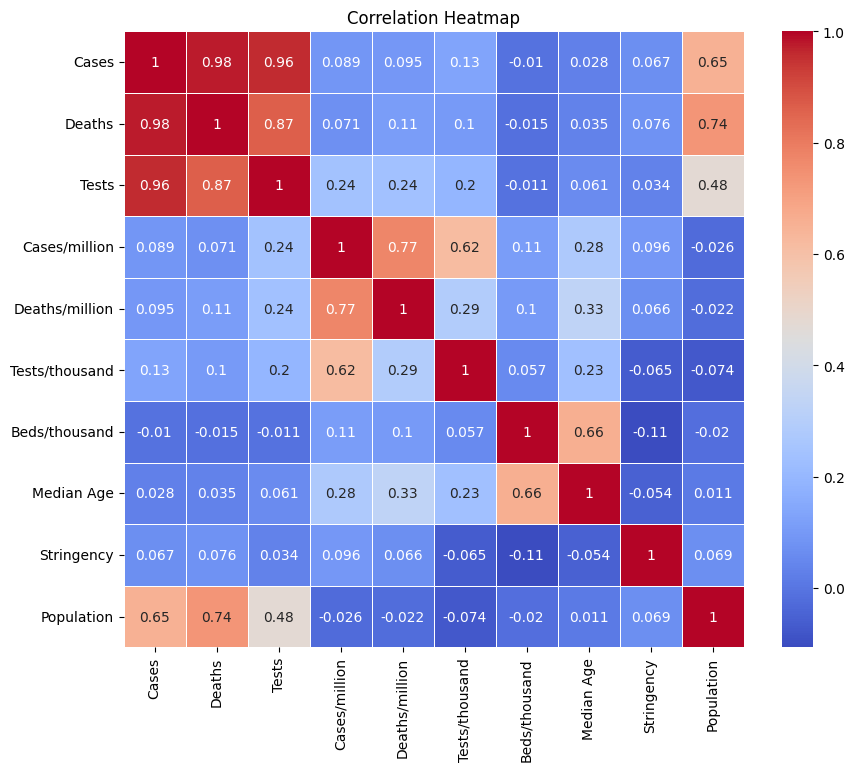

In [7]:

df = covid_data

# Create shorter column names
short_column_names = {
    'location': 'Country',
    'total_cases': 'Cases',
    'total_deaths': 'Deaths',
    'total_tests': 'Tests',
    'total_cases_per_million': 'Cases/million',
    'total_deaths_per_million': 'Deaths/million',
    'total_tests_per_thousand': 'Tests/thousand',
    'hospital_beds_per_thousand': 'Beds/thousand',
    'median_age': 'Median Age',
    'stringency_index': 'Stringency',
    'population': 'Population'
}

# Rename columns with shorter names
df = df.rename(columns=short_column_names)

# Select the columns of interest with shorter names
columns_of_interest = list(short_column_names.values())

# Select data for Norway only
norway_data = df[df['Country'] == 'Norway']

# Create a subset of the DataFrame with selected columns
subset_df = df[columns_of_interest]

# Visualize data distributions
plt.figure(figsize=(12, 8))

# Create a heatmap to visualize correlations between numeric columns
correlation_matrix = subset_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-pack

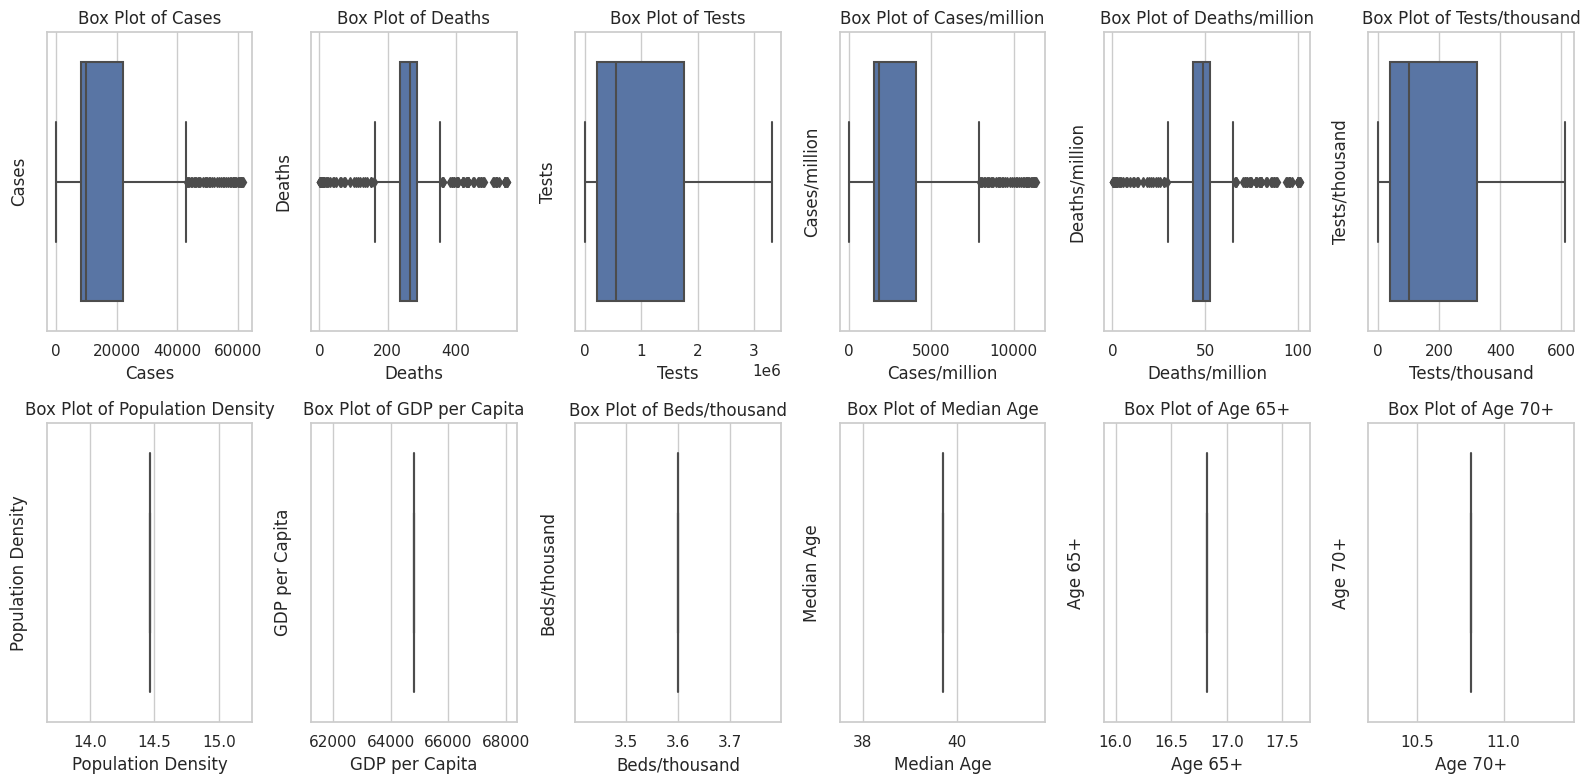

In [8]:
 import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you've already loaded the dataset and named it 'covid_data'
df = covid_data

# Create shorter column names
short_column_names = {
    'location': 'Country',
    'date': 'Date',
    'total_cases': 'Cases',
    'total_deaths': 'Deaths',
    'total_tests': 'Tests',
    'total_cases_per_million': 'Cases/million',
    'total_deaths_per_million': 'Deaths/million',
    'total_tests_per_thousand': 'Tests/thousand',
    'population_density': 'Population Density',
    'gdp_per_capita': 'GDP per Capita',
    'hospital_beds_per_thousand': 'Beds/thousand',
    'median_age': 'Median Age',
    'aged_65_older': 'Age 65+',
    'aged_70_older': 'Age 70+',
    'stringency_index': 'Stringency',
    'population': 'Population'
}

# Rename columns with shorter names
df = df.rename(columns=short_column_names)

# Select data for Norway only
norway_data = df[df['Country'] == 'Norway']

# Select the numeric columns for box plots
numeric_columns = ['Cases', 'Deaths', 'Tests', 'Cases/million', 'Deaths/million', 'Tests/thousand',
                   'Population Density', 'GDP per Capita', 'Beds/thousand', 'Median Age', 'Age 65+', 'Age 70+']

# Create box plots for the selected columns
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")

# Loop through the numeric columns and create box plots
for i, col in enumerate(numeric_columns):
    plt.subplot(2, 6, i + 1)
    sns.boxplot(x=norway_data[col], orient='v')
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


# Insert Covid Cases Dataset for Norway into MongoDB

In [9]:
df=covid_data
no_data = df[df['location'] == 'Norway']
no_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
41488,NOR,Europe,Norway,2020-02-23,NaN,NaN,NaN,NaN,NaN,NaN,...,64800.057,0.2,114.316,5.31,19.6,20.7,NaN,3.6,82.4,0.953
41489,NOR,Europe,Norway,2020-02-24,NaN,NaN,NaN,NaN,NaN,NaN,...,64800.057,0.2,114.316,5.31,19.6,20.7,NaN,3.6,82.4,0.953
41490,NOR,Europe,Norway,2020-02-25,NaN,NaN,NaN,NaN,NaN,NaN,...,64800.057,0.2,114.316,5.31,19.6,20.7,NaN,3.6,82.4,0.953
41491,NOR,Europe,Norway,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,...,64800.057,0.2,114.316,5.31,19.6,20.7,NaN,3.6,82.4,0.953
41492,NOR,Europe,Norway,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,64800.057,0.2,114.316,5.31,19.6,20.7,NaN,3.6,82.4,0.953


In [10]:
!pip3 install pymongo

import pymongo
from pymongo import MongoClient
client = MongoClient('40.82.211.185',27000, username = "admin", password = "abc123")

In [11]:
client.server_info()

ServerSelectionTimeoutError: ignored

In [ ]:
client.list_database_names()

In [ ]:
db=client['bdm']

In [ ]:
collection=db["no_data"]

In [ ]:
subset_no_data = no_data[['location',
    'date',
    'total_cases',
    'total_deaths',
    'total_tests',
    'total_cases_per_million',
    'total_deaths_per_million',
    'total_tests_per_thousand',
    'population_density',
    'gdp_per_capita',
    'hospital_beds_per_thousand',
    'median_age',
    'aged_65_older',
    'aged_70_older',
    'stringency_index',
    'population',]]

In [ ]:
subset_no_data.head()

In [ ]:
subset_no_data['date'] =  pd.to_datetime(subset_no_data['date'], format="%Y-%m-%d")

In [ ]:
subset_no_data.head()

In [ ]:
dic_dat = subset_no_data.T

In [ ]:
dic_dat

In [ ]:
dic_dat =dic_dat.to_dict()
list(dic_dat.values())

In [ ]:
list(dic_dat.values())

In [ ]:
documents_to_insert = list(subset_no_data.T.to_dict().values())


In [ ]:
collection.insert_many(documents_to_insert)

# PySpark Code


In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
%%bash

pwd

In [ ]:
!wget https://downloads.apache.org/spark/spark-3.4.1/spark-3.4.1-bin-hadoop3.tgz

In [ ]:
!tar -xf spark-3.4.1-bin-hadoop3.tgz

In [ ]:
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.4.1-bin-hadoop3"

In [ ]:
import findspark
findspark.init()
findspark.find()

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local")\
        .appName("colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

In [ ]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip
get_ipython().system_raw('./ngrok http 4050 &')
!curl -s http://localhost:4040/api/tunnels

In [ ]:
get_ipython().system_raw('./ngrok http 4050 &')
!curl -s http://localhost:4040/api/tunnels

In [ ]:
spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()
sc = spark.sparkContext

In [ ]:
!pip3 install pymongo

import pymongo
from pymongo import MongoClient
# !pip3 install pymongo
import datetime

In [ ]:
client = MongoClient('40.82.211.185',27000, username = "admin", password = "abc123")

client.server_info()

In [ ]:
db = client['bdm']
collection = db['no_data']

In [ ]:
df = spark.read.csv("/content/drive/MyDrive/Colab Notebooks/Datasets/covid_cases.csv")

df.show(10)

In [ ]:
df.printSchema()

In [ ]:
# Import necessary libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.sql.window import Window

# Create a Spark session
spark = SparkSession.builder.appName("CovidMobilityAnalysis").getOrCreate()

# Load the two datasets
mobility_df = spark.read.csv("/content/drive/MyDrive/Colab Notebooks/Datasets/2020_AU_Region_Mobility_Report.csv", header=True)
covid_df = spark.read.csv("/content/drive/MyDrive/Colab Notebooks/Datasets/covid_cases.csv", header=True)

# Create temporary tables for SQL operations
mobility_df.createOrReplaceTempView("mobility_data")
covid_df.createOrReplaceTempView("covid_data")

# Research Question a:
# How have mobility trends in Australia changed during different phases of COVID-19 restrictions?
# And what is the impact of these changes on the spread of the virus and healthcare demands in Australia?

# Select data for Australia
australia_mobility_df = spark.sql("SELECT * FROM mobility_data WHERE country_region = 'Australia'")
australia_covid_df = spark.sql("SELECT * FROM covid_data WHERE location = 'Australia'")

# Join the mobility and COVID-19 datasets on the 'Date' column
australia_combined_df = australia_mobility_df.join(australia_covid_df, on="Date", how="inner")

# Perform analysis on Australia's data, e.g., analyze trends in mobility and COVID-19 cases

# Research Question b:
# How have COVID-19 cases and outcomes differed among countries with varying healthcare infrastructure and resources?
# What role does the density of the population play in the transmission of COVID-19, and how can this information inform urban planning and public health strategies in Australia and Norway?

# Select data for Australia and Norway
australia_norway_covid_df = spark.sql("SELECT * FROM covid_data WHERE location IN ('Australia', 'Norway')")

# Perform analysis on Australia and Norway's data, e.g., compare healthcare infrastructure, population density, and COVID-19 outcomes




In [ ]:
# Import necessary libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Create a Spark session
spark = SparkSession.builder.appName("AustraliaNorwayComparison").getOrCreate()

# Create a temporary table for SQL operations
covid_df.createOrReplaceTempView("covid_data")


# Select data for Australia and Norway
australia_norway_df = spark.sql("SELECT * FROM covid_data WHERE location IN ('Australia', 'Norway')")

# Perform analysis on Australia and Norway's data
analysis_result = australia_norway_df.select(
    "location",
    "total_cases",
    "total_deaths",
    "total_tests",
    "total_cases_per_million",
    "total_deaths_per_million",
    "total_tests_per_thousand",
    "population_density",
    "gdp_per_capita",
    "hospital_beds_per_thousand"
).groupBy("location").agg(
    {"total_cases": "max",
     "total_deaths": "max",
     "total_tests": "max",
     "total_cases_per_million": "max",
     "total_deaths_per_million": "max",
     "total_tests_per_thousand": "max",
     "population_density": "max",
     "gdp_per_capita": "max",
     "hospital_beds_per_thousand": "max"}
)

# Show the analysis result
analysis_result.show()



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Create a Spark session
spark = SparkSession.builder.appName("AustraliaNorwayComparison").getOrCreate()

# Create a temporary table for SQL operations
covid_df.createOrReplaceTempView("covid_data")

# Research Question:
# How have COVID-19 cases and outcomes differed between Australia and Norway,
# considering healthcare infrastructure, population density, and COVID-19 outcomes?

# Select data for Australia and Norway
australia_norway_df = spark.sql("SELECT * FROM covid_data WHERE location IN ('Australia', 'Norway')")

# Perform analysis and store the result in a Pandas DataFrame
analysis_result = australia_norway_df.select(
    "location",
    col("total_cases").cast("int"),
    "total_deaths",
    "total_tests",
    "total_cases_per_million",
    "total_deaths_per_million",
    "total_tests_per_thousand",
    "population_density",
    "gdp_per_capita",
    "hospital_beds_per_thousand"
).groupBy("location").agg(
    {"total_cases": "max",
     "total_deaths": "max",
     "total_tests": "max",
     "total_cases_per_million": "max",
     "total_deaths_per_million": "max",
     "total_tests_per_thousand": "max",
     "population_density": "max",
     "gdp_per_capita": "max",
     "hospital_beds_per_thousand": "max"}
).toPandas()

# Create a bar plot to visualize the analysis result
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Plot the metrics for Australia and Norway
ax = sns.barplot(x="location", y="max(total_cases)", data=analysis_result, ci=None)
ax.set(xlabel="Location", ylabel="Max Total Cases")
plt.title("Comparison of Max Total COVID-19 Cases: Australia vs. Norway")

plt.show()




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Create a Spark session
spark = SparkSession.builder.appName("HealthcareComparison").getOrCreate()

# Load the COVID-19 dataset (assuming you've already loaded the dataset)


# Create a temporary table for SQL operations
covid_df.createOrReplaceTempView("covid_data")

# Research Question:
# Compare healthcare infrastructure, population density, and COVID-19 outcomes for different countries.


# Select data for the selected countries
selected_countries_df = spark.sql(f"SELECT * FROM covid_data WHERE location IN ('Australia', 'Norway')")

# Perform analysis and store the result in a Pandas DataFrame
analysis_result = selected_countries_df.select(
    "location",
    col("total_cases").cast("int"),
    col("total_deaths").cast("int"),
    "total_tests",
    "total_cases_per_million",
    "total_deaths_per_million",
    "total_tests_per_thousand",
    "population_density",
    "gdp_per_capita",
    "hospital_beds_per_thousand"
).groupBy("location").agg(
    {"total_cases": "max",
     "total_deaths": "max",
     "total_tests": "max",
     "total_cases_per_million": "max",
     "total_deaths_per_million": "max",
     "total_tests_per_thousand": "max",
     "population_density": "max",
     "gdp_per_capita": "max",
     "hospital_beds_per_thousand": "max"}
).toPandas()

# Create a bar plot to visualize the analysis result
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Plot the metrics for the selected countries
ax = sns.barplot(x="location", y="max(total_cases)", data=analysis_result, ci=None)
ax.set(xlabel="Location", ylabel="Max Total Cases")
plt.title("Comparison of Max Total COVID-19 Cases for Selected Countries")

plt.xticks(rotation=45)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Create a Spark session
spark = SparkSession.builder.appName("AustraliaNorwayComparison").getOrCreate()

# Load the healthcare infrastructure dataset (replace with your dataset)
healthcare_df = spark.read.csv("/content/drive/MyDrive/Colab Notebooks/Datasets/2020_AU_Region_Mobility_Report.csv", header=True, inferSchema=True)

# Select data for Australia and Norway
australia_norway_healthcare = healthcare_df.filter((col("country_region") == "Australia") | (col("country_region") == "Norway"))
australia_norway_covid = covid_df.filter((col("location") == "Australia") | (col("location") == "Norway"))

# Compare healthcare infrastructure indicators and population density
australia_healthcare = australia_norway_healthcare.filter(col("country_region") == "Australia")
norway_healthcare = australia_norway_healthcare.filter(col("country_region") == "Norway")

# Cast the 'hosp_patients' column to a numeric data type
australia_healthcare = australia_healthcare.withColumn("grocery_and_pharmacy_percent_change_from_baseline", col("grocery_and_pharmacy_percent_change_from_baseline").cast("double"))
norway_healthcare = norway_healthcare.withColumn("grocery_and_pharmacy_percent_change_from_baseline", col("grocery_and_pharmacy_percent_change_from_baseline").cast("double"))

# Calculate COVID-19 indicators per million people
australia_covid = australia_norway_covid.filter(col("location") == "Australia")
norway_covid = australia_norway_covid.filter(col("location") == "Norway")

population_million = 1000000  # To convert indicators to per million

australia_covid = australia_covid.withColumn("cases_per_million", col("total_cases") / (col("population") / population_million))
australia_covid = australia_covid.withColumn("deaths_per_million", col("total_deaths") / (col("population") / population_million))

norway_covid = norway_covid.withColumn("cases_per_million", col("total_cases") / (col("population") / population_million))
norway_covid = norway_covid.withColumn("deaths_per_million", col("total_deaths") / (col("population") / population_million))

# Convert PySpark DataFrames to Pandas DataFrames for plotting
australia_healthcare_pd = australia_healthcare.toPandas()
norway_healthcare_pd = norway_healthcare.toPandas()

australia_covid_pd = australia_covid.toPandas()
norway_covid_pd = norway_covid.toPandas()

# Plot healthcare infrastructure comparisons (e.g., hospital beds per thousand)
plt.figure(figsize=(12, 6))
sns.barplot(x="grocery_and_pharmacy_percent_change_from_baseline", y="grocery_and_pharmacy_percent_change_from_baseline", hue="country_region", data=australia_healthcare_pd)
plt.title("Healthcare Infrastructure Comparison: Australia vs. Norway")
plt.xlabel("Indicator")
plt.ylabel("Hospital Patients per Million")
plt.xticks(rotation=45)
plt.show()

# Plot COVID-19 indicators per million people (e.g., cases and deaths)
plt.figure(figsize=(12, 6))
sns.barplot(x="location", y="cases_per_million", data=australia_covid_pd, label="Australia")
sns.barplot(x="location", y="cases_per_million", data=norway_covid_pd, label="Norway")
plt.title("COVID-19 Cases per Million People: Australia vs. Norway")
plt.xlabel("Location")
plt.ylabel("Cases per Million")
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x="location", y="deaths_per_million", data=australia_covid_pd, label="Australia")
sns.barplot(x="location", y="deaths_per_million", data=norway_covid_pd, label="Norway")
plt.title("COVID-19 Deaths per Million People: Australia vs. Norway")
plt.xlabel("Location")
plt.ylabel("Deaths per Million")
plt.legend()
plt.show()


In [ ]:
# Import necessary libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

# Define start_date and end_date
start_date = datetime(2020, 2, 15)
end_date = datetime(2020, 3, 30)

# Filter data for Australia and Norway in the mobility dataset within the specified date range
australia_mobility = mobility_df.filter(
    (col("country_region") == "Australia") & (col("date") >= start_date) & (col("date") <= end_date)
)
norway_mobility = mobility_df.filter(
    (col("country_region") == "Norway") & (col("date") >= start_date) & (col("date") <= end_date)
)

# Filter data for Australia and Norway in the COVID-19 case dataset within the specified date range
australia_covid = covid_df.filter(
    (col("location") == "Australia") & (col("date") >= start_date) & (col("date") <= end_date)
)
norway_covid = covid_df.filter(
    (col("location") == "Norway") & (col("date") >= start_date) & (col("date") <= end_date)
)

# Convert PySpark DataFrames to Pandas DataFrames for plotting
australia_mobility_pd = australia_mobility.toPandas()
norway_mobility_pd = norway_mobility.toPandas()

australia_covid_pd = australia_covid.toPandas()
norway_covid_pd = norway_covid.toPandas()

# Remove rows with missing values in Pandas DataFrames
australia_mobility_pd.dropna(subset=["date", "retail_and_recreation_percent_change_from_baseline"], inplace=True)
norway_mobility_pd.dropna(subset=["date", "retail_and_recreation_percent_change_from_baseline"], inplace=True)
australia_covid_pd.dropna(subset=["date", "total_cases"], inplace=True)
norway_covid_pd.dropna(subset=["date", "total_cases"], inplace=True)

# Mobility Dataset Line Plots
plt.figure(figsize=(12, 6))
plt.plot(australia_mobility_pd["date"], australia_mobility_pd["retail_and_recreation_percent_change_from_baseline"], label="Australia")
plt.plot(norway_mobility_pd["date"], norway_mobility_pd["retail_and_recreation_percent_change_from_baseline"], label="Norway")
plt.title("Mobility Trends in Australia and Norway (Mobility Dataset)")
plt.xlabel("Date")
plt.ylabel("Retail and Recreation Percent Change")
plt.legend()
plt.show()

# COVID-19 Dataset Line Plots
plt.figure(figsize=(12, 6))
plt.plot(australia_covid_pd["date"], australia_covid_pd["total_cases"], label="Australia")
plt.plot(norway_covid_pd["date"], norway_covid_pd["total_cases"], label="Norway")
plt.title("COVID-19 Total Cases in Australia and Norway")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.show()


In [ ]:
# Import necessary libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, month
import matplotlib.pyplot as plt

# Create a Spark session
spark = SparkSession.builder.appName("AustraliaNorwayComparison").getOrCreate()

# Load the mobility dataset (replace with your dataset)
mobility_df = spark.read.csv("/content/drive/MyDrive/Colab Notebooks/Datasets/2020_AU_Region_Mobility_Report.csv", header=True, inferSchema=True)

# Load the COVID-19 case dataset (replace with your dataset)
covid_df = spark.read.csv("/content/drive/MyDrive/Colab Notebooks/Datasets/covid_cases.csv", header=True, inferSchema=True)

# Filter data for Australia and Norway in the mobility dataset
australia_mobility = mobility_df.filter(col("country_region") == "Australia")
norway_mobility = mobility_df.filter(col("country_region") == "Norway")

# Filter data for Australia and Norway in the COVID-19 case dataset
australia_covid = covid_df.filter(col("location") == "Australia")
norway_covid = covid_df.filter(col("location") == "Norway")

# Group and aggregate mobility data by month
australia_mobility_monthly = australia_mobility.groupBy(month("date").alias("month")).avg()
norway_mobility_monthly = norway_mobility.groupBy(month("date").alias("month")).avg()

# Convert PySpark DataFrames to Pandas DataFrames for plotting
australia_mobility_monthly_pd = australia_mobility_monthly.toPandas()
norway_mobility_monthly_pd = norway_mobility_monthly.toPandas()

# Monthly Bar Plots for Retail and Recreation Mobility Trends
plt.figure(figsize=(12, 6))
plt.bar(australia_mobility_monthly_pd["month"], australia_mobility_monthly_pd["avg(residential_percent_change_from_baseline)"], label="Australia", width=0.4, color='blue')
plt.bar(norway_mobility_monthly_pd["month"] + 0.4, norway_mobility_monthly_pd["avg(residential_percent_change_from_baseline)"], label="Norway", width=0.4)
plt.title("Monthly Residential Trends in Australia and Norway")
plt.xlabel("Month")
plt.ylabel("Average Retail and Recreation Percent Change")
plt.legend()
plt.show()

# COVID-19 Dataset Line Plots
plt.figure(figsize=(12, 6))
plt.plot(australia_covid_pd["date"], australia_covid_pd["total_cases"], label="Australia")
plt.plot(norway_covid_pd["date"], norway_covid_pd["total_cases"], label="Norway")
plt.title("COVID-19 Total Cases in Australia and Norway")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.show()


In [ ]:
# Import necessary libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, month
import matplotlib.pyplot as plt

# Create a Spark session
spark = SparkSession.builder.appName("AustraliaNorwayComparison").getOrCreate()

# Load the mobility dataset (replace with your dataset)
mobility_df = spark.read.csv("/content/drive/MyDrive/Colab Notebooks/Datasets/2020_AU_Region_Mobility_Report.csv", header=True, inferSchema=True)

# Load the COVID-19 case dataset (replace with your dataset)
covid_df = spark.read.csv("/content/drive/MyDrive/Colab Notebooks/Datasets/covid_cases.csv", header=True, inferSchema=True)

# Filter data for Australia and Norway in the mobility dataset
australia_mobility = mobility_df.filter(col("country_region") == "Australia")
norway_mobility = mobility_df.filter(col("country_region") == "Norway")

# Filter data for Australia and Norway in the COVID-19 case dataset
australia_covid = covid_df.filter(col("location") == "Australia")
norway_covid = covid_df.filter(col("location") == "Norway")

# Group and aggregate mobility data by month
australia_mobility_monthly = australia_mobility.groupBy(month("date").alias("month")).avg()
norway_mobility_monthly = norway_mobility.groupBy(month("date").alias("month")).avg()

# Convert PySpark DataFrames to Pandas DataFrames for plotting
australia_mobility_monthly_pd = australia_mobility_monthly.toPandas()
norway_mobility_monthly_pd = norway_mobility_monthly.toPandas()

# Group and aggregate COVID-19 case data by month
australia_covid_monthly = australia_covid.groupBy(month("date").alias("month")).sum()
norway_covid_monthly = norway_covid.groupBy(month("date").alias("month")).sum()

# Convert PySpark DataFrames to Pandas DataFrames for plotting
australia_covid_monthly_pd = australia_covid_monthly.toPandas()
norway_covid_monthly_pd = norway_covid_monthly.toPandas()

# Set the figure size for the plots
plt.figure(figsize=(12, 6))

# Create side-by-side bar plots for mobility data
plt.subplot(1, 2, 1)
plt.bar(australia_mobility_monthly_pd["month"], australia_mobility_monthly_pd["avg(transit_stations_percent_change_from_baseline)"], label="Australia", width=0.4)
plt.bar(norway_mobility_monthly_pd["month"] + 0.4, norway_mobility_monthly_pd["avg(transit_stations_percent_change_from_baseline)"], label="Norway", width=0.4)
plt.title("Monthly Transit Mobility Trends")
plt.xlabel("Month")
plt.ylabel("Avg Retail and Recreation Percent Change")
plt.legend()

# Create side-by-side bar plots for COVID-19 case data
plt.subplot(1, 2, 2)
plt.bar(australia_covid_monthly_pd["month"], australia_covid_monthly_pd["sum(total_cases)"], label="Australia", width=0.4)
plt.bar(norway_covid_monthly_pd["month"] + 0.4, norway_covid_monthly_pd["sum(total_cases)"], label="Norway", width=0.4)
plt.title("Monthly COVID-19 Total Cases")
plt.xlabel("Month")
plt.ylabel("Total Cases")
plt.legend()

# Adjust the layout and show the plots
plt.tight_layout()
plt.show()


In [ ]:
# Import necessary libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
import matplotlib.pyplot as plt
import seaborn as sns

# Create a Spark session
spark = SparkSession.builder.appName("ComplexComparison").getOrCreate()

# Load the mobility dataset (replace with your dataset)
mobility_df = spark.read.csv("/content/drive/MyDrive/Colab Notebooks/Datasets/2020_AU_Region_Mobility_Report.csv", header=True, inferSchema=True)

# Load the COVID-19 case dataset (replace with your dataset)
covid_df = spark.read.csv("/content/drive/MyDrive/Colab Notebooks/Datasets/covid_cases.csv", header=True, inferSchema=True)

# Filter data for Australia in the mobility dataset
australia_mobility = mobility_df.filter(col("country_region") == "Australia")

# Filter data for Australia in the COVID-19 case dataset
australia_covid = covid_df.filter(col("location") == "Australia")

# Select relevant columns for correlation analysis
mobility_columns = ["retail_and_recreation_percent_change_from_baseline", "grocery_and_pharmacy_percent_change_from_baseline", "parks_percent_change_from_baseline", "transit_stations_percent_change_from_baseline", "workplaces_percent_change_from_baseline", "residential_percent_change_from_baseline"]

covid_columns = ["total_cases", "total_deaths", "total_tests"]

# Create a correlation matrix for mobility metrics and COVID-19 cases
mobility_corr_matrix = australia_mobility.select(*mobility_columns).toPandas().corr()
covid_corr_matrix = australia_covid.select(*covid_columns).toPandas().corr()

# Create subplots for mobility metrics and COVID-19 cases
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Heatmap for mobility metrics
mobility_heatmap = sns.heatmap(mobility_corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[0])
axes[0].set_title("Correlation Heatmap for Mobility Metrics")

# Customize x and y labels for the mobility heatmap
mobility_heatmap.set_xticklabels(mobility_heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')
mobility_heatmap.set_yticklabels(mobility_heatmap.get_yticklabels(), rotation=0, horizontalalignment='right')

# Heatmap for COVID-19 cases
covid_heatmap = sns.heatmap(covid_corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[1])
axes[1].set_title("Correlation Heatmap for COVID-19 Cases")

# Customize x and y labels for the COVID-19 heatmap
covid_heatmap.set_xticklabels(covid_heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')
covid_heatmap.set_yticklabels(covid_heatmap.get_yticklabels(), rotation=0, horizontalalignment='right')

plt.tight_layout()
plt.show()

